# Impact of Family Relationships on Academic Perfomance of Students

#### Stat 201 Group 41

Ishraq Mostafa - 58930181

Stellar Shar - 17113275

Pedro Sodre - 65503195

## Introduction 

A child’s growth is largely shaped by their surrounding factors, and family acts as a preliminary stage for youth development. Specifically, research has shown that family background and structure play an important role in terms of a child’s academic achievement and learning behaviour (Li & Qiu, 2018). In relation, relationships within the family are equally crucial in determining a member's well-being (Thomas et al. 2017). As a result, family relationships may also impact a child’s growth and academic outcomes. 

The goal of our project is to explore whether family relationship qualities impact students’ academic performances. We are essentially trying to solve the question: 

_“Do students with high-quality family relationships have better grades than those with lower-quality family relationships?”._  

The dataset we are using is the Student Performance Data set from UCI Machine Learning Repository (Cortez & Silva, 2008). The data was collected from school reports and questionnaires conducted in two Portuguese schools, including variables targeting student social and academic activities, family status, and student grades. 

https://archive.ics.uci.edu/ml/datasets/Student+Performance


The variables we are interested in for our analysis are as follows: 

- Famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- Pstatus: parents’ cohabitation status (binary: “T” - living together, “A” - apart)
- G3: final grade in math class (numeric: from 0 - 20) 

We will be using `famrel` as the explanatory variable and `G3` as the response variable. We see `Pstatus` as a _confounding variable_ (a third variable that influences both the explanatory and response variable),  as it is a determining aspect of a family, and can affect both the quality of family relationships and a child’s academic outcomes. Thus, to reduce the effect of this confounding variable, we plan to target only families with cohabiting parents. In this case, the `Pstatus` status will be a blocking factor (a source of unwanted variability in the response variable). By only taking data where `Pstatus` = “T”, ie blocking it out, we are essentially ruling out the effect of the parents’ cohabitation status. 

The collection methods of this dataset is unknown, in turn, we accept that there are uncertainties associated with using this dataset. Applying this to our variables of interest, we are unsure of the criteria used behind family relationship quality ratings and whether or not the final grade of students is based only on examinations or if it incorporates academic behaviour. 

## Methods and Results

### Preliminary Results 

#### 1. Loading the dataset: 

We load the Student Performance Data Set from the UCI Machine Mearning Repository into R. The data file `student-mat.csv` is uploaded on github and read using the github link.

In [46]:
# Load libraries
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)
library(readr)

In [47]:
# Download zip file and read csv file

download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", "student.zip")

data <- read.csv(unzip("student.zip", "student-mat.csv"), sep=";")

head(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


#### 2. Cleaning the dataset:
- We first filter the dataset to obtain those data with `PStatus` = “T” 
- Mutate `famrel`: For famrel values lower than 3, we mutate them to _lower_quality_. For `famrel` values higher than 4, we muate them to _higher_quanlity_. 
We choose to not incorporate values 3 and 4 as we want to assign low and high quality labels to values on either extreme end. 

In [48]:
fam_data <- data %>% filter(Pstatus == "T") %>% select(famrel, G3)

head(fam_data)

,famrel,G3
,<int>,<int>
1,5,6
2,4,10
3,3,15
4,4,10
5,5,15
6,4,11


In [49]:
set.seed(101)

c_low_quality = fam_data %>% filter(famrel < 3) %>% mutate(famrel = "low_quality") 
c_high_quality = fam_data %>% filter(famrel > 4) %>% mutate(famrel = "high_quality")


fam_grade_data <- rbind(c_low_quality, c_high_quality)

colnames(fam_grade_data) = c("famrel", "grade")

head(fam_grade_data)
tail(fam_grade_data)

,famrel,grade
,<chr>,<int>
1,low_quality,8
2,low_quality,15
3,low_quality,11
4,low_quality,5
5,low_quality,13
6,low_quality,0


,famrel,grade
,<chr>,<int>
109,high_quality,15
110,high_quality,10
111,high_quality,5
112,high_quality,10
113,high_quality,0
114,high_quality,7


#### 3. Location and scale parameter 
We are interested in using the _mean_ and _standard deviation_ in final grades of students to compare the distributions of grades between high family quality and low family quality. 

Let us first take a look at the observed _mean_ and _standard deviation_ of each of the low and high quality groups.

In [50]:
high_famrel_quality <- fam_grade_data %>% filter(famrel == "high_quality") %>% pull(grade)
low_famrel_quality <- fam_grade_data %>% filter(famrel == "low_quality") %>% pull(grade)

high_quality_mean <- mean(high_famrel_quality)
low_quality_mean <- mean(low_famrel_quality)

high_quality_sd <- sd(high_famrel_quality)
low_quality_sd <- sd(low_famrel_quality)

print(paste("The mean and standard deviation of the grade of high famrel quality group are ", 
            high_quality_mean, " and ", high_quality_sd, " respectively."))

print(paste("The mean and standard deviation of the grade of low famrel quality group are ", 
            low_quality_mean, " and ", low_quality_sd, " respectively."))

[1] "The mean and standard deviation of the grade of high famrel quality group are  10.5591397849462  and  4.79687934243712  respectively."
[1] "The mean and standard deviation of the grade of low famrel quality group are  9.85714285714286  and  5.70338245504994  respectively."


The calculated values of _mean_ and _standard deviation_ show a slight difference between the two groups. However, these values are not enough to draw any significant conclusion. We might want to plot boxplots of the two groups to get a better understanding of the distributions.

#### 4. Visualization

We plot side-by-side boxplots of the `grade` of each of the _high_quality_ and _low_quality_ groups, along with a lines indicating the mean of each group. The plots can help us better understand the two groups to compre them.

NULL

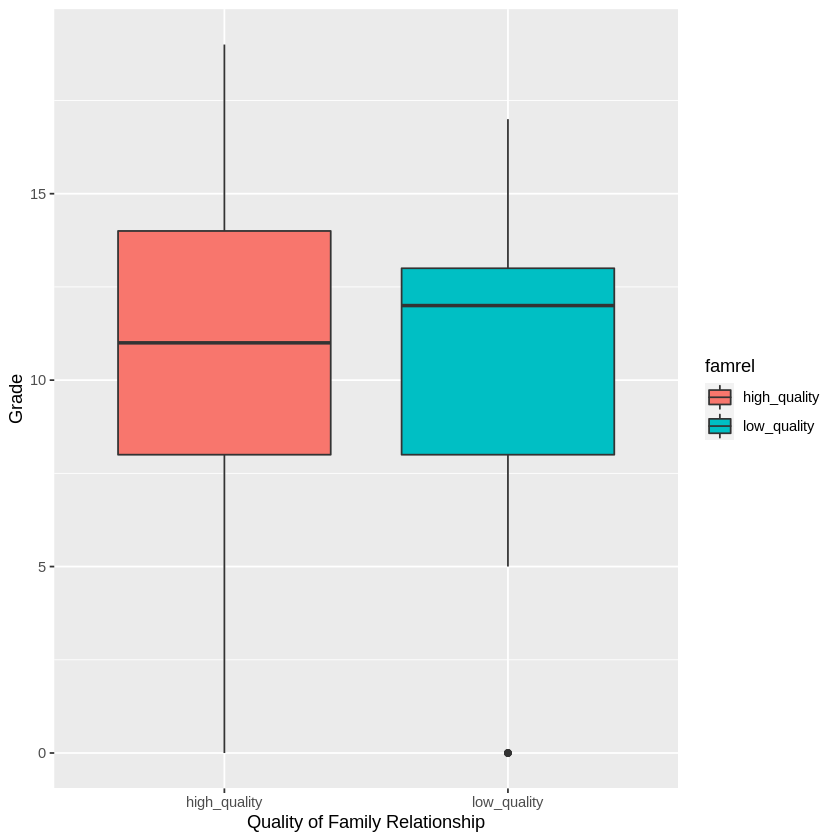

In [51]:
side_by_side_boxplots <- 
    fam_grade_data %>%  
    ggplot() + 
    geom_boxplot(aes(x = famrel, y = grade, fill = famrel)) + 
    ylab("Grade") +
    xlab("Quality of Family Relationship")
    ggtitle("Boxplots of Grade for Low and High Family Relation Groups") +
    # theme(text = element_text(size=25)) +
    geom_hline(yintercept = high_quality_mean, color = "red") +
    geom_hline(yintercept = low_quality_mean, color = "dark green")

side_by_side_boxplots

The box plots indicate that the distrubution of grades for each group cover a similar range, with _high_quality_ group covering slighly more higher values and thus having a slightly greater mean. The visualization helps us understand the distributions, but the data is not statistically significant. We need to conduct hypothesis testing to draw strong conclusions about the data.

### Plan
We are interested in comparing differences in grades of students with _high_quality relationships vs _low_quality_ relationships.  T

Let us recall the question we are looking to answer:

_“Do students with high-quality family relationships have better grades than those with lower-quality family relationships?”._  

**Hypothesis Testing**

To  proceed with the comparison in education, we will implement hypothesis testing: 
Let us call the mean grade of those in _low_quality_ famrel, $\mu_1$
Let us call the mean grade of those in _high_quality_ famrel, $\mu_2$
Similarly, we denote the standard deviation of the grades of those in low_quality_famrel using $\sigma_1$ and the standard deviation of the grades of those in high_quality_famrel using $\sigma_2$.

- $H_0$: 
$\mu_1$ = $\mu_2$
The mean final grades of those with a lower rating in family relationship quality is equal to the mean final grades of those with a higher rating in family relationship qualities. 

- $H_1$: 
$\mu_1$ < $\mu_2$
The mean final grades of those with lower rating family relationship quality is less than the mean final grades of those with higher rating family relationship qualities. 

Moreover, we will use standard deviation to analyze the results that we receive. In addition, we will use a 95% confidence interval to demonstrate the precision of our estimates. 

Based on the previously stated scientific reports on the importance of family environment to children’s development, we expect family relationships to impact students’ grades. More specifically, we expect the mean grades of students with higher rated family relationships to be better.

**Bootstrapping and Confidence Intervals**

From the dataset, we only have access to one sample from which we obtained the parameters. However, the estimates may not be enough as it is based on a single sample, and may not be a great estimate for the population parameter. Thus, to address this, we will use bootstrapping to resample with replacement and use the bootstrap distribution for hypothesis testing. In addition, we do not know enough about the population distribution to apply asymptotica methods. As well, it is not feasible to get many samples to obtain a sampling distribution as it requires large efforts and time commitments. To ensure that our estimates are trustworthy, we will implement bootstrapping and confidence intervals.

### Hypothesis Testing and Results

#### 1. Create null distribution:
We obtained the null distribution (distribution assuming our null hypothesis is true) using _infer_.
We took 1000 permutations from `fam_grade_data`.

In [52]:
null_dist_of_diff_in_means <- fam_grade_data %>%
    specify(formula = grade ~ famrel) %>%
    hypothesize("independence") %>%
    generate(type = "permute", reps = 1000) %>%
    calculate(stat = "diff in means", order = c("low_quality", "high_quality"))

head(null_dist_of_diff_in_means)

replicate,stat
<int>,<dbl>
1,-2.7450077
2,-0.8771121
3,-0.7019969
4,2.3917051
5,-0.7019969
6,-0.4685100


#### 2. Calculating test statistic and p-value

We calculated a difference in the _observed mean final grades_ between students with low family relationship quality and high family relationship quality. 

Using the test statistic and null distribution found a _p-value_ of **0.261**. 

In [53]:
obs_diff_in_means <- low_quality_mean - high_quality_mean

p_value <- null_diff_in_means %>%
    get_p_value(obs_stat = obs_diff_in_means, direction = "left")

print(paste("The observed difference in mean final grades between students with low quality and high quality family relationships is ", 
            obs_diff_in_means))

print(paste("The p-value based on the null distribution and observed difference in means is ", 
            p_value))

[1] "The observed difference in mean final grades between students with low quality and high quality family relationships is  -0.701996927803378"
[1] "The p-value based on the null distribution and observed difference in means is  0.261"


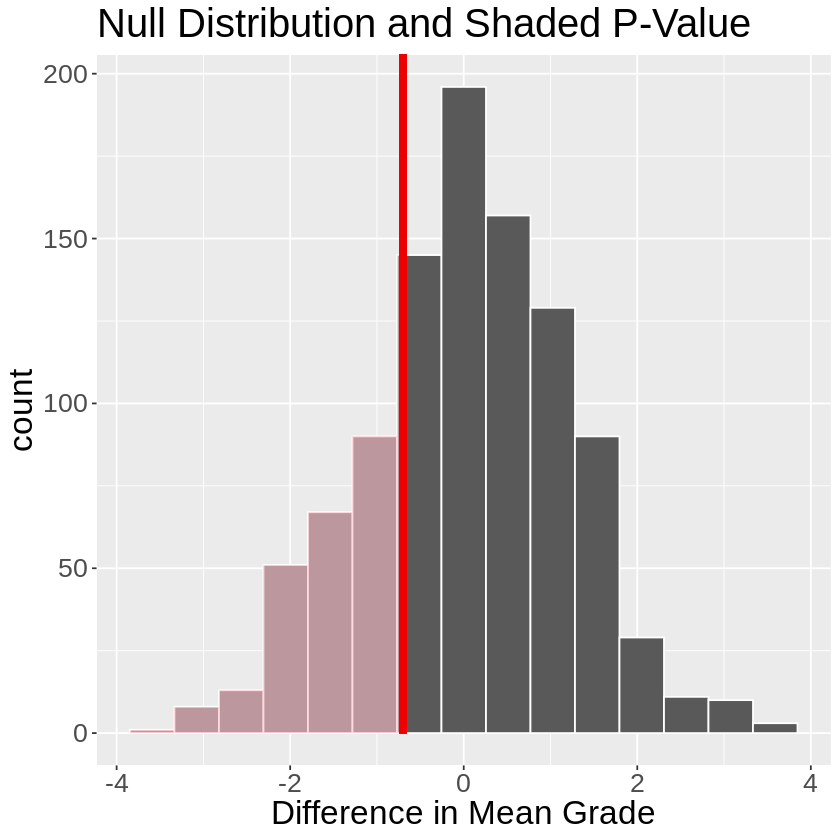

In [54]:
visualize_null_dist <-
   null_dist_of_diff_in_means %>% 
   visualize() + 
   shade_p_value(obs_stat = obs_diff_in_means, direction = "left") +
   xlab("Difference in Mean Grade") + 
   ggtitle("Null Distribution and Shaded P-Value") +
   theme(text = element_text(size=20))

visualize_null_dist

Applying this result with our previously set _significance level_ of 0.05, since our _p-value_ is greater, we **do not reject** the null hypothesis that the difference in mean grades is zero. 

#### 3. Calculating a 95% confidence interval

We computed a bootstrap distribution of the difference in mean final grades using _infer_.
We took 1000 re-samples with replacement, with final grade as the response variable, and famrel as the explanatory response. 

In [44]:
bootstrap_dist_of_diff_in_means <- fam_grade_data %>%
    specify(formula = grade ~ famrel) %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in means", order = c("low_quality", "high_quality"))

head(bootstrap_dist_of_diff_in_means)

replicate,stat
<int>,<dbl>
1,-0.5729167
2,0.4836253
3,-1.0216837
4,-1.3760153
5,-4.0888889
6,-2.0337942


In [45]:
confidence_interval_of_diff_in_means <- diff_in_means_bootstrap_dist %>%
    get_confidence_interval(level = 0.95, type = "percentile")

confidence_interval_of_diff_in_means

lower_ci,upper_ci
<dbl>,<dbl>
-3.37901,1.700293


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



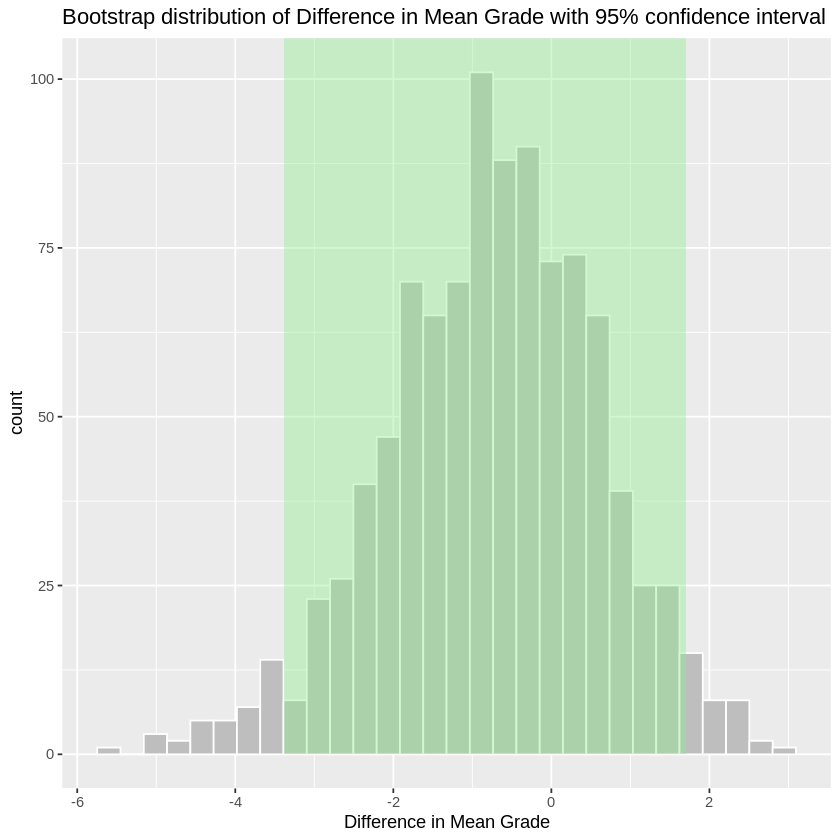

In [29]:
confidence_interval_bootstrap_plot <- 
    bootstrap_dist_of_diff_in_means %>% 
    ggplot(aes(x = stat)) +
    geom_histogram(colour = "white", 
                   fill = "grey") +
    annotate("rect", 
             xmin = confidence_interval_of_diff_in_means$lower_ci, 
             xmax = confidence_interval_of_diff_in_means$upper_ci, 
             ymin = 0, 
             ymax = Inf, 
             fill = "lightgreen", 
             alpha = 0.4) +
    labs(title = "Bootstrap distribution of Difference in Mean Grade with 95% confidence interval",
         x = "Difference in Mean Grade")

confidence_interval_bootstrap_plot

We calculated a 95% confidence interval between the range -3.38 and 1.70. This value suggests that if we were to repeat our current testing methods 100 times and compute a 95% confidence interval each time, 95 of those new confidence intervals will be able to capture the true difference between mean final grades of students with lower family relationship quality and students with higher family relationship quality. We can also say that we are 95% confident that the true difference in mean final grades falls between -3.38 and 1.70.

## Discussion

**Interpretation of findings:**

The standard deviations that we calculated for the distribution of final grades is 5.70 for students with lower family relationship qualities and 4.80 for students with higher family relationship qualities. As the standard deviation for students with lower family relationship qualities is larger than those with higher family relationship qualities, this suggests that there is more variation in terms of final grades for students with lower family relationship qualities. 

As previously stated, we found a p-value of 0.261. This value suggests that assuming the null hypothesis to be true, the probability of obtaining a difference in mean final grades as extreme as the observed is 26.1%. Relating that to our significance level of 5%, we conclude that there is not enough evidence to reject the null hypothesis and accept that the mean final grade of students with lower family relationship qualities is equal to the mean final grades of students with higher family relationship qualities. That being said, we recognize that there are possibilities for Type II error.
 
**Expectations vs Actual Findings:**

Based on previously stated scientific reports on the importance of the family environment to children’s development, we expected family relationships to impact student grades; we expected the mean grades of students with higher-rated family relationships to be better. However, our findings from the study after analysis do not support our initial hypothesis. We did not find enough evidence to determine that there is a statistically significant difference between the mean final grades of students with lower family relationship qualities and those with higher family relationship qualities. Nonetheless, we keep in mind the uncertainties in the collection methods associated with this dataset. 
 
**Significance:**

Despite the fact that the null hypothesis was not rejected, this investigation still contains valuable insights. As briefly mentioned above,  it functions as an invitation to conduct further studies and attempt to identify why the data failed to support a rejection of the hypothesis and if that is because the quality of family relationships truly has negligible to no effect on student grades, or whether that could have been a result of the way in which family-relationship quality was measured in the data and if it truly represents the reality of the familial relationships of students. It serves to further direct, in more detail, where and how the attention and resources should be applied in the educational 
Additionally, it also invites consideration of other aspects of a child's background and how they interact with the academic facet of the child’s life. Perhaps other aspects or other measurements of a student’s family life are more relevant to academic performance, or perhaps even alternative factors of a student’s background altogether, that do not relate to family, should be focused on. 

The results of this investigation are significant because they can be used by the government, educational institutions, and of course, parents, to better understand what impacts the performance of students and what factors they should stay aware of concerning the academic development of children. It serves as literature that can be used to assist in raising awareness of the importance of healthy family dynamics to the lives of students in Portugal.
 
It is relevant to mention that while the conclusions of this investigation refer to students in Portugal, as that is where the original data comes from, it is reasonably expected that this relationship would hold beyond the population constraints of this study, and in doing so, be potentially extendible to students from around the world.


## References 
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Li, Z., Qiu, Z. How does family background affect children’s educational achievement? Evidence from Contemporary China. J. Chin. Sociol. 5, 13 (2018). https://doi.org/10.1186/s40711-018-0083-8

Thomas, P. A., Liu, H., & Umberson, D. (2017). Family Relationships and Well-Being. Innovation in aging, 1(3), igx025. https://doi.org/10.1093/geroni/igx025